In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("datos.dat", sep = ",")
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"])
df = pd.DataFrame({"FECHA" : df["TIMESTAMP"],
                   "TEMP" : df["AirTC_Avg"]
})

df["AÑO"] = df["FECHA"].dt.year
df["MES"] = df["FECHA"].dt.month
df["DIA"] = df["FECHA"].dt.day
df["HORA"] = df["FECHA"].dt.hour
 
df.describe()

,TEMP,AÑO,MES,DIA,HORA
count,40660.000000,40660.000000,40660.000000,40660.000000,40660.000000
mean,23.114218,2018.170708,7.413625,15.807821,11.498524
std,9.059851,0.376259,3.414580,8.759259,6.927122
min,-1.591000,2018.000000,1.000000,1.000000,0.000000
25%,15.960000,2018.000000,6.000000,8.000000,5.000000
50%,24.330000,2018.000000,8.000000,16.000000,11.000000
75%,30.090000,2018.000000,10.000000,23.000000,18.000000
max,45.370000,2019.000000,12.000000,31.000000,23.000000


In [3]:
## Calcular el promedio por hora de la temperatura

hora_anterior = 20
suma = 0
c = 0
temps = []
fecha = []
for i in range(0,len(df)):
    if(df["HORA"][i] == hora_anterior):
        suma = suma + df["TEMP"][i]
        hora_anterior = df["HORA"][i]
        c = c+1
    else:
        temps.append(suma/c)
        fecha.append(df["FECHA"][i])
        suma = df["TEMP"][i]
        hora_anterior = df["HORA"][i]
        c = 1
temps.append(suma/c)
fecha.append(df["FECHA"][i])

In [4]:
## Creo un data frame con los promedios
df2 = pd.DataFrame({"FECHA" : fecha,
                    "TEMP" : temps})
df2["FECHA"] = pd.to_datetime(df2.FECHA)
df2["AÑO"] = df2["FECHA"].dt.year
df2["MES"] = df2["FECHA"].dt.month
df2["DIA"] = df2["FECHA"].dt.day

df2 = df2[df2["FECHA"]>= "2018-11-01"]
df2 = df2.reset_index(drop = True)
df2.head()

,FECHA,TEMP,AÑO,MES,DIA
0,2018-11-01 00:00:00,10.170000,2018,11,1
1,2018-11-01 01:00:00,8.708333,2018,11,1
2,2018-11-01 02:00:00,8.493333,2018,11,1
3,2018-11-01 03:00:00,8.690000,2018,11,1
4,2018-11-01 04:00:00,8.846667,2018,11,1


In [5]:
HF = []
HC = []

for i in range(df2["AÑO"][0],df2["AÑO"][len(df2)-1]+1):
    dfnen = df2[df2["AÑO"] == i]
    for j in range(dfnen["MES"][dfnen.index[0]],dfnen["MES"][dfnen.index[len(dfnen)-1]]+1):
        dfmes = dfnen[dfnen["MES"] == j]
        for k in range(dfmes["DIA"][dfmes.index[0]],dfmes["DIA"][dfmes.index[len(dfmes)-1]]+1):
            dfdia = dfmes[dfmes["DIA"] == k]
            for n in dfdia.index:
                if(0 < dfdia["TEMP"][n] <= 10):
                    HF.append(1)
                    HC.append(0)
                elif(dfdia["TEMP"][n] > 25):
                    HF.append(0)
                    HC.append(1)
                else:
                    HF.append(0)
                    HC.append(0)

In [6]:
df2["HF"] = HF
df2["HC"] = HC

In [7]:
df2["HF24"] = df2.groupby(["AÑO","MES","DIA"])["HF"].transform("sum")
df2["T>25"] = df2.groupby(["AÑO","MES","DIA"])["HC"].transform("sum")
df2["HFE"] = df2["HF24"] - df2["T>25"]

In [8]:
df3 = df2.drop_duplicates(["AÑO","MES","DIA"]).reset_index(drop=True)

In [10]:
df4 = df3[df3["HFE"] >= 0].reset_index(drop=True)
df4.head()

,FECHA,TEMP,AÑO,MES,DIA,HF,HC,HF24,T>25,HFE
0,2018-11-01,10.170000,2018,11,1,0,0,8,6,2
1,2018-11-12,11.468333,2018,11,12,0,0,8,3,5
2,2018-11-13,10.531667,2018,11,13,0,0,5,1,4
3,2018-11-14,13.135000,2018,11,14,0,0,8,0,8
4,2018-11-15,8.263167,2018,11,15,1,0,11,4,7


In [59]:
#df3 = df3.drop(["AÑO","MES","DIA"],1)#,"HF","HC"],axis = 1)

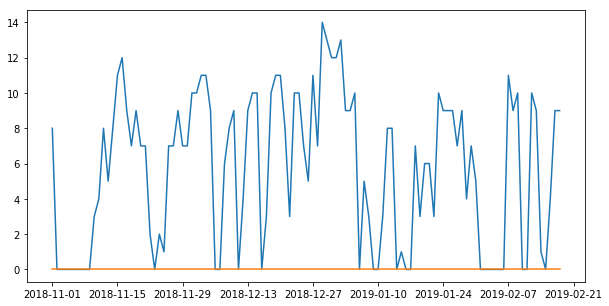

In [61]:
cosas = df4[["HF24","HC"]]
plt.figure(figsize = (10,5))
plt.plot(df3["FECHA"],cosas)
plt.show()